## 光线追踪

### 1.背景知识简介

####  α.why?

回忆一下我们一开始是如何做渲染的，首先MVP变换将一切落位，然后进行采样，如果想得到更好的效果我们还应该进行着色。现在我们换一个角度重新出发，目的是更好的完成同样的渲染任务

#### β.how?

想象我们的虚拟相机在A点，然后A点前面是一个像素面，根据光的可逆性，我们可以通过，连接A与像素面上的每一个像素点，作为一个虚拟的光线射入场景中，然后我们跟踪这个光线hh，会发现光线打到了一的地方。然后我们返回这个点的颜色值就可以知道这个像素点的颜色了。-----只是大概的思路

### 2.框架关键点解释

总体思路：首先构建出来场景（Scene）Scene类中有object（物体）之后物体又对应于（triangle）然后我们从renderer出发，发射一个光线 然后利用castray（）来求得对应的像素点的颜色 并记录下来 

castray会发射光线到场景中，然后与物体的三角求交，然后我们会得到最后的颜色。

当然还有很多细节：

比如怎么反射，怎么折射还有fresnel项（这个点我目前没有很好的理解）

还有我们设定了最大的弹射次数，所以程序不会无法停下。

物体的材料以及他的颜色是由object里面的kd,ks..定义的
### 3.需要自己实现的部分

第一部分---发射光线

这里视频中没有具体的讲道，不过比较简单，老虎书上对应位置有一些解释，另外推荐看一下https://www.scratchapixel.com/lessons/3d-basic-rendering/ray-tracing-generating-camera-rays/generating-camera-rays


第二部分---实现与三角形的求交

这里有两种方法

1.首先求一下光线与三角形所在的平面的交点，然后根据我们之前已经做过的任务，我们可以判断这个点是不是在三角形内。

2.利用重心坐标

重心坐标应该都学过没学过自己去搜一下，这个不是难点。不过利用重心坐标这个思路真的很清奇hh。

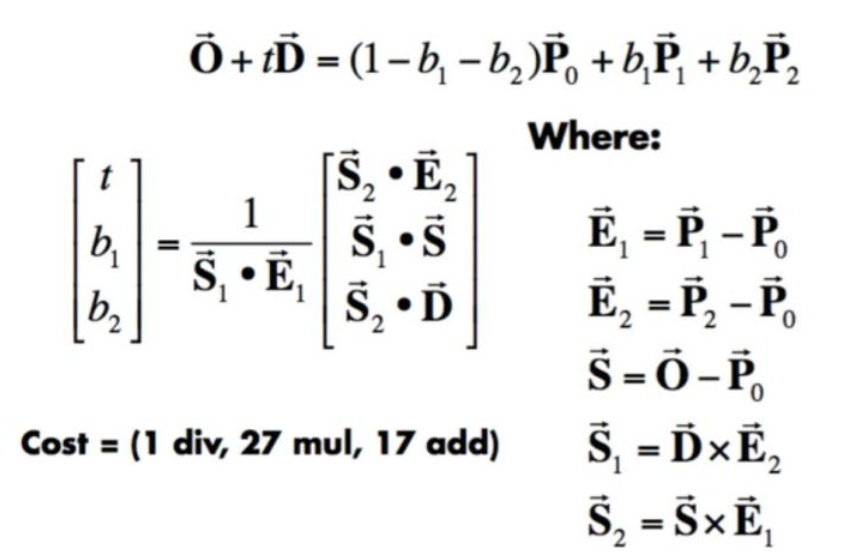

（图片来自games101）

O是我们光线的源点，D是direction 

最后验证下t是不是大于零 另外b1+b2是不是小于1并且b1>=0,b2>=0就可以了-----具体见代码

我们选择的是第二种方法，我感觉其实都可以啦，第二种简洁一点。一步完成。

### 4.一些有价值的问题:

物体是怎么被分为三角形的呢？

